In [41]:
import os
import pandas as pd
import yaml

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [42]:
root_dir = r".\results\2024Mar24-140101_baseline_configs"  

In [43]:
def collect_experiment_data(root_dir):
    """
    Collects experiment data and selected parameters from configuration files across multiple runs.
    
    Parameters:
    - root_dir: The root directory where experiment results are stored.
    
    Returns:
    - A pandas DataFrame containing the collected data and parameters.
    """
    all_data = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith("loss_record.csv"):
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the loss record CSV file
                df = pd.read_csv(file_path)
                
                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, 'r') as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)
                
                # Extract needed parameters
                run_id = cfg_data.get('run_id')
                tau = cfg_data['tau']
                lower_bound_softmax = cfg_data['lower_bound_softmax']
                
                # Add parameters as new columns to the DataFrame
                df['run_id'] = run_id
                df['tau'] = tau
                df['lower_bound_softmax'] = lower_bound_softmax
                
                # Append to the list of all data
                all_data.append(df)

    # Concatenate all data into a single DataFrame
    return pd.concat(all_data, ignore_index=True)

combined_data = collect_experiment_data(root_dir)
combined_data

aggregated_df = combined_data.groupby(['run_id', 'tau', 'lower_bound_softmax']).agg({'epoch': 'max'}).reset_index()

aggregated_df

,run_id,tau,lower_bound_softmax,epoch
0,0,0.001,0.5,299
1,1,0.001,0.5,299
2,2,0.001,0.5,299
3,3,0.001,0.5,299
4,4,0.001,0.5,299
5,5,0.001,0.5,299
6,6,0.001,0.5,299
7,7,0.001,0.5,299
8,8,0.001,0.5,299
9,9,0.001,0.5,299


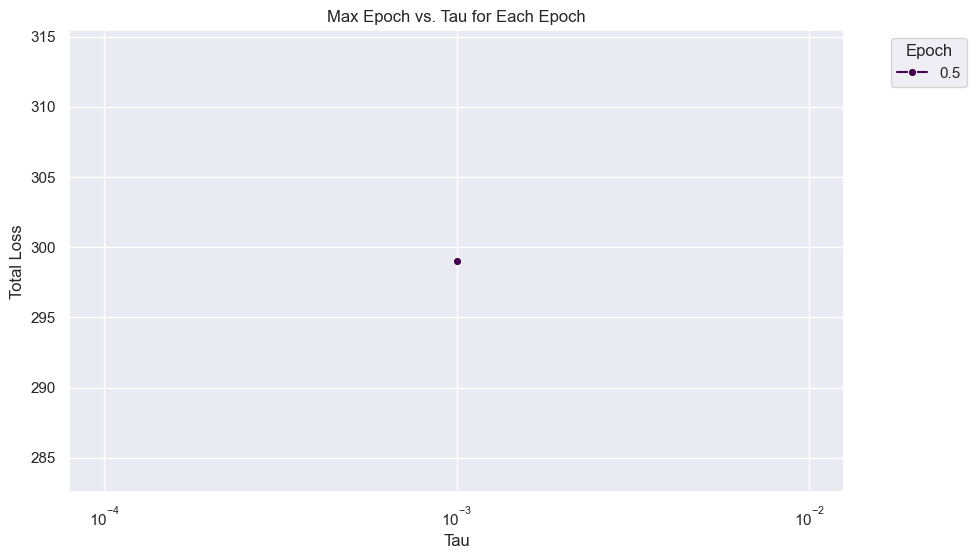

In [44]:
plt.figure(figsize=(10, 6))
# Assuming you want to plot the loss for the last epoch of each run, you can filter or aggregate the data as needed
sns.lineplot(data=aggregated_df, x='tau', y='epoch', hue='lower_bound_softmax', palette='viridis', marker='o')
plt.xlabel('Tau')
plt.ylabel('Total Loss')
plt.xscale('log')
# plt.yscale('log')
plt.title('Max Epoch vs. Tau for Each Epoch')
plt.legend(title='Epoch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [45]:
def collect_bellman_errors(root_dir):
    """
    Collects Bellman error values and selected parameters from configuration files across multiple runs.
    
    Parameters:
    - root_dir: The root directory where experiment results are stored.
    
    Returns:
    - A pandas DataFrame containing the collected Bellman errors and parameters.
    """
    all_errors = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file == "bellman_error.txt":
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the Bellman error value from the file
                with open(file_path, 'r') as error_file:
                    bellman_error = float(error_file.read().strip())
                
                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, 'r') as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)
                
                # Extract needed parameters
                run_id = cfg_data.get('run_id')
                tau = cfg_data['tau']
                lower_bound_softmax = cfg_data['lower_bound_softmax']
                
                # Create a dictionary with the collected data
                error_data = {
                    'run_id': run_id,
                    'tau': tau,
                    'lower_bound_softmax': lower_bound_softmax,
                    'bellman_error': bellman_error
                }
                
                # Append to the list of all errors
                all_errors.append(error_data)

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(all_errors)

# Example usage
bellman_errors_df = collect_bellman_errors(root_dir)
bellman_errors_df

,run_id,tau,lower_bound_softmax,bellman_error
0,0,0.001,0.5,1.298547e-02
1,1,0.001,0.5,4.909404e+10
2,10,0.001,0.5,1.509927e-02
3,11,0.001,0.5,1.074680e-02
4,12,0.001,0.5,1.500889e-02
5,13,0.001,0.5,1.399553e-02
6,14,0.001,0.5,1.586781e-02
7,15,0.001,0.5,5.021379e+10
8,16,0.001,0.5,5.096878e+06
9,17,0.001,0.5,2.177009e-02


In [46]:
# bellman_errors_df_filtered = bellman_errors_df[bellman_errors_df["tau"]!=0.01]
bellman_errors_df_filtered = bellman_errors_df[bellman_errors_df["lower_bound_softmax"]!=0]

In [47]:
bellman_errors_df_filtered["tau"].min()

0.001

In [48]:
bellman_errors_df_filtered["lower_bound_softmax"] = bellman_errors_df_filtered["lower_bound_softmax"].astype(str) 

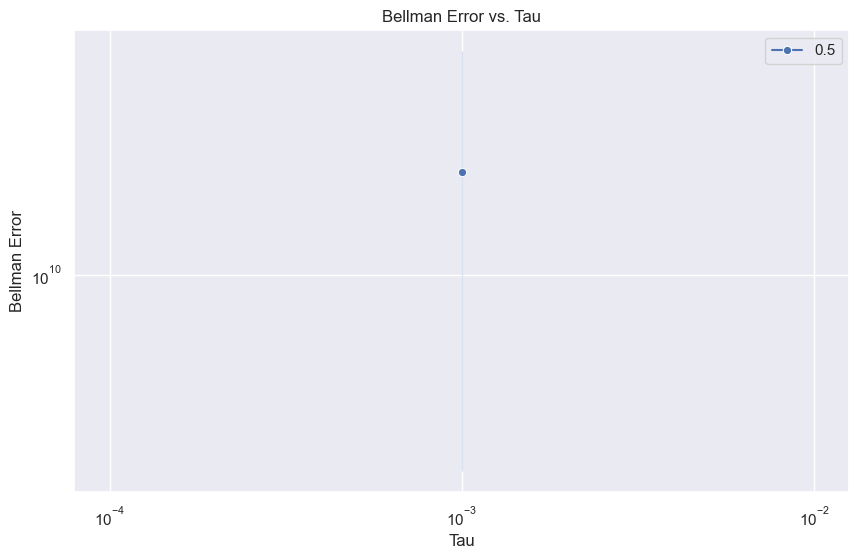

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=bellman_errors_df_filtered,
    x="tau",
    y="bellman_error",
    hue="lower_bound_softmax",
    marker="o",
    # label="Bellman Error",
)
plt.xlabel("Tau")
plt.ylabel("Bellman Error")
plt.xscale("log")
plt.yscale("log")
plt.title("Bellman Error vs. Tau")
plt.legend()
plt.show()

In [50]:
high_tau_df = bellman_errors_df_filtered[bellman_errors_df_filtered["tau"]==1]
high_tau_df['bellman_error'].mean()

nan

In [51]:
bellman_errors_df_filtered["bellman_error"].min()

0.010746800899505615

In [52]:
#use mdp to generate transition distribution
# this generates another dataset of transitions

# then apply:
# ### Training
# input_size = len(states[0])  # Or another way to represent the size of your input
# output_size = len(actions)

# # Initialize the DQN
# dqn = DQN(input_size, output_size)

# loss_record = train_dqn(
#     dqn,
#     sampled_transitions_train,
#     Q_pi_random,
#     states,
#     actions,
#     gamma,
#     epsilon,
#     batch_size=batch_size,
#     max_iterations=train_max_iterations,
#     logger=logger,
# )

# bm_error = compute_bellmans_error(
#     dqn, validation_transitions=transitions_val, gamma=gamma
# )

### AND

# policy evaluation

# plot both

In [53]:
# do policy evaluation on train datasets -> Q 
# Evaluate with Q on validation set

# training DQN == value iteration
# we want to do policy evaluation with DQN (we do this by changing the loss function with bellman equation for Q pi instead of Q*)
# if we want to do early stopping, do it with Q* instead of Q pi random

In [54]:
print(30*20*3, 30.75/(30*20*3))
print(35*25*4, 34.7/(35*25*4))
print(35*27*5, 32.2/(35*27*5))
print(41*25*8, 40.49/(41*25*8))
print(43*29*7.5, 60/(43*29*7.5))
print(44*34*5, 46/(44*34*5))


1800 0.017083333333333332
3500 0.009914285714285716
4725 0.006814814814814815
8200 0.004937804878048781
9352.5 0.006415396952686447
7480 0.006149732620320855
